### Rotational mass in Nordic system

#### Have a look at Nordic energy mix

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from cycler import cycler

CASE = "Base"
#UK_NODES = ["GreatBrit."]

df_gen = pd.read_csv(f'Results/{CASE}/results_output_gen.csv')
df_nordic_gen = df_gen[df_gen["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_nordic_gen

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,Denmark,Coalexisting,2020-2025,0.000000,3165.000000,0.540161,0.000000,14976.192858
1,Denmark,Coalexisting,2025-2030,0.000000,1947.692308,0.607855,0.000000,10371.089597
2,Denmark,Coalexisting,2030-2035,0.000000,1308.605769,0.409177,0.000000,4690.550739
3,Denmark,Coalexisting,2035-2040,0.000000,912.980769,0.044467,0.000000,355.636593
4,Denmark,Coalexisting,2040-2045,0.000000,633.000000,0.000171,0.000000,0.948294
...,...,...,...,...,...,...,...,...
1115,NO5,Nuclear,2035-2040,0.000211,0.000336,0.554571,649.022094,0.001630
1116,NO5,Nuclear,2040-2045,0.000065,0.000400,0.440312,135.621411,0.001544
1117,NO5,Nuclear,2045-2050,0.000584,0.000984,0.386325,798.457765,0.003330
1118,NO5,Nuclear,2050-2055,0.000004,0.000988,0.507088,3.297553,0.004389


Nordic (NO, SE, DK & FI) generation by source for case: Base
['Windonshore', 'Hydroregulated', 'Hydrorun-of-the-river', 'Nuclear', 'Bio', 'Windoffshoregrounded', 'GasOCGT', 'GasCCGT', 'Waste', 'Wave', 'Solar', 'Coal', 'Oilexisting', 'Bioexisting', 'Gasexisting', 'GasCCSadv', 'GasCCS', 'Coalexisting']


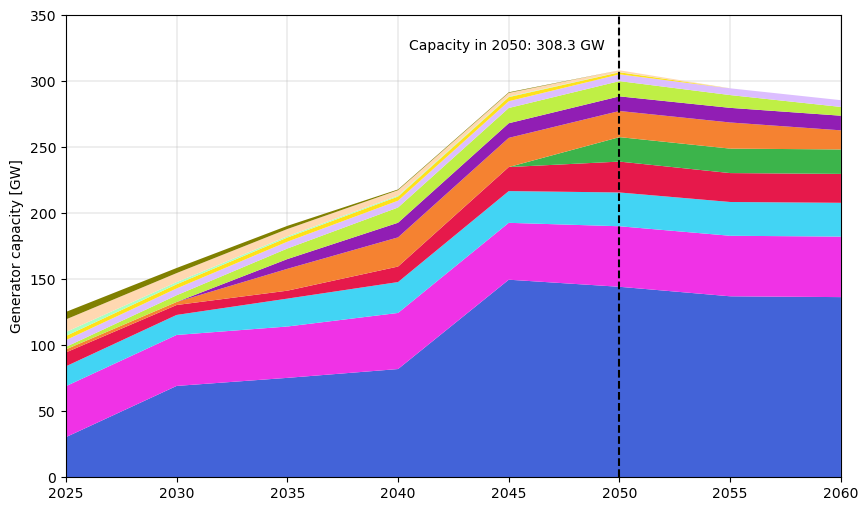

In [40]:
def plot_gen_by_source(case, _df):
    print(f"Nordic (NO, SE, DK & FI) generation by source for case: {case}")

    df_gen_source = _df.copy()
    df_gen_source["genInstalledCap_MW"] = df_gen_source.groupby(['GeneratorType', 'Period'])['genInstalledCap_MW'].transform('sum')
    df_gen_source = df_gen_source.drop_duplicates(("GeneratorType", "Period"), ignore_index=True)[["GeneratorType", "Period", "genInstalledCap_MW"]]

    periods = list(df_gen_source["Period"].unique())

    gen_source_sorted_by_cap = list(df_gen_source[df_gen_source["Period"] == "2055-2060"]\
                              .sort_values(by="genInstalledCap_MW", ascending=False)["GeneratorType"].values)
    
    gen_source_displayed = gen_source_sorted_by_cap

    installed_caps_gen = []
    for gen_source in gen_source_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df_gen_source[(df_gen_source["GeneratorType"] == gen_source) & (df_gen_source["Period"] == period)]["genInstalledCap_MW"].values[0])

        # Remove gen_source that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            gen_source_displayed.remove(gen_source)
        else:
            installed_caps_gen.append(cap_by_period)

    installed_caps_gen_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps_gen]
    period_displayed_gen = [period.split("-")[1] for period in periods]

    print(gen_source_displayed)

    plt.rcParams.update({'font.size': 10})
    default_cycler = cycler(color=[TECH_TO_COLOR[tech] for tech in gen_source_displayed])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True, prop_cycle=default_cycler)
    plt.grid(lw=0.3)
    plt.stackplot(period_displayed_gen, installed_caps_gen_GW, labels=gen_source_displayed)
    plt.ylabel('Generator capacity [GW]')
    #plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)

    y_max = 350
    plt.ylim(0, y_max)
    
    # Plot capacity 2050 
    cap_2050 = sum([cap[5] for cap in installed_caps_gen_GW]) # Total trans cap in GW

    # Align text based on height of peak
    # prod_by_periods = [sum([gen_cap[i] for gen_cap in installed_caps_gen_GW]) for i in range(8)]
    # max_prod = max(prod_by_periods)

    plt.axvline(x = 5, color = 'black', ls="--")
    plt.text(x=3.1, y=y_max*0.95, s=f"Capacity in 2050: {round(cap_2050, 1)} GW", verticalalignment='top')
    plt.savefig(f"SavedFigs/RotationalMass/Nordic-EnergyMix", bbox_inches='tight')
    plt.show()

plot_gen_by_source(CASE, df_nordic_gen)

Operational data set to calculate rotational mass

In [41]:
df_rotm = pd.read_csv(f"Results/{CASE}/results_output_Operational.csv")
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,scenario1,winter,1,6538.649258,-9934.890034,-6.538649e+03,0.0,0.0,...,-0.000182,0.000333,62352.000326,-0.000022,-2326.759594,5900.000225,-177.000007,3.394153e-08,58.949191,0.022063
1,Austria,2020-2025,scenario1,winter,2,6574.378780,-9839.652657,-6.574379e+03,0.0,0.0,...,-0.000148,238.028414,62113.972042,-0.000018,-598.084708,3737.453937,-112.123618,3.394267e-08,60.772369,0.021943
2,Austria,2020-2025,scenario1,winter,3,7893.059452,-9938.130187,-7.893059e+03,0.0,0.0,...,-0.000171,1820.094287,60293.877905,-0.000021,-490.220426,737.316542,-22.119496,3.394149e-08,60.772371,0.018277
3,Austria,2020-2025,scenario1,winter,4,8008.239099,-10509.670167,-8.008239e+03,0.0,0.0,...,-0.000177,2681.833008,57612.045053,-0.000022,-521.606948,351.757923,-10.552738,3.394033e-08,60.772371,0.018014
4,Austria,2020-2025,scenario1,winter,5,8076.980746,-10797.928132,-8.076981e+03,0.0,0.0,...,-0.000178,2968.235360,54643.809849,-0.000022,-501.917703,262.505059,-7.875152,3.393946e-08,60.772371,0.017861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192315,EnergyhubCentral,2055-2060,scenario3,peak2,716,0.000000,-0.000000,-3.478585e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30451.469678,31393.267710,-941.798031,0.000000e+00,31.956595,0.000000
1192316,EnergyhubCentral,2055-2060,scenario3,peak2,717,0.000000,-0.000000,-1.697851e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30451.469678,31393.267710,-941.798031,0.000000e+00,31.956597,0.000000
1192317,EnergyhubCentral,2055-2060,scenario3,peak2,718,0.000000,-0.000000,-2.299513e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30451.469678,31393.267710,-941.798031,0.000000e+00,31.956596,0.000000
1192318,EnergyhubCentral,2055-2060,scenario3,peak2,719,0.000000,-0.000000,-2.244466e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30451.469678,31393.267710,-941.798031,0.000000e+00,31.956598,0.000000


Calculate mean values of scenarios 

In [42]:
df_rotm = df_rotm.groupby(["Node", "Period", "Hour"]).mean(numeric_only=True).reset_index()
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,1,6770.195657,-9483.377179,-6770.195657,0.0,0.0,0.0,112.499960,...,-0.000167,0.000476,62352.000169,-0.000021,-1748.826689,4600.008146,-138.000244,3.393017e-08,51.597112,0.075370
1,Austria,2020-2025,2,6695.756504,-9250.773997,-6695.756504,0.0,0.0,0.0,112.499759,...,-265.044657,79.342982,62484.692928,-53.008915,-1182.859327,4044.926284,-121.347789,3.392674e-08,50.379482,0.076597
2,Austria,2020-2025,3,7156.881491,-9552.050437,-7156.881491,0.0,0.0,0.0,112.499760,...,-268.268892,606.698276,62092.609782,-53.653762,-1094.704166,3248.911060,-97.467332,3.392528e-08,50.379482,0.074601
3,Austria,2020-2025,4,7101.838907,-9607.756654,-7101.838907,0.0,0.0,0.0,112.499760,...,-678.676297,893.944520,61741.606315,-135.735243,-687.993882,3070.766397,-92.122992,3.392419e-08,50.379482,0.075476
4,Austria,2020-2025,5,6986.079278,-9701.184300,-6986.079278,0.0,0.0,0.0,112.499759,...,-469.128965,989.411973,61127.497530,-93.825777,-561.686325,2841.761175,-85.252835,3.392326e-08,50.379483,0.077270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397435,VestavindF,2055-2060,716,0.006133,0.000000,-0.006133,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.092057,0.088579,-0.002657,2.726754e-06,382.515770,0.000000
397436,VestavindF,2055-2060,717,0.006547,0.000000,-0.006547,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.093749,0.089896,-0.002697,2.726675e-06,382.527242,0.000000
397437,VestavindF,2055-2060,718,0.006799,0.000000,-0.006799,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.092656,0.088509,-0.002655,2.727826e-06,383.358011,0.000000
397438,VestavindF,2055-2060,719,0.007200,0.000000,-0.007200,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.089201,0.084535,-0.002536,2.726224e-06,383.327386,0.000000


Filter by Nordic markets

In [43]:
df_rotm = df_rotm[df_rotm["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Denmark,2020-2025,1,4907.924349,-5816.958454,-4907.924349,0.0,0.0,0.0,2143.783529,...,-0.000140,0.000222,0.000387,-0.000014,-1740.683307,2731.667350,-81.950021,3.390540e-08,39.633685,0.497576
1,Denmark,2020-2025,2,4346.206799,-5688.709421,-4346.206799,0.0,0.0,0.0,1582.499935,...,-0.000192,0.000156,0.000405,-0.000019,-1209.882532,2631.324939,-78.939748,3.389414e-08,37.562859,0.409549
2,Denmark,2020-2025,3,4247.234734,-5743.498792,-4247.234734,0.0,0.0,0.0,1582.487286,...,-0.000200,0.000150,0.000434,-0.000020,-1205.038780,2784.848338,-83.545450,3.389313e-08,37.305303,0.410145
3,Denmark,2020-2025,4,4115.995385,-5678.394031,-4115.995385,0.0,0.0,0.0,1582.487848,...,-0.000200,0.000151,0.000464,-0.000020,-1198.882068,2846.681199,-85.400436,3.389260e-08,37.305301,0.410269
4,Denmark,2020-2025,5,4161.702847,-5568.497960,-4161.702847,0.0,0.0,0.0,1582.499910,...,-0.000196,0.000151,0.000489,-0.000020,-1156.403321,2642.472659,-79.274180,3.389258e-08,37.558436,0.387113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46075,Sweden,2055-2060,716,28812.981484,-31781.332665,-28812.981484,0.0,0.0,0.0,0.000000,...,-76.374357,0.002591,1009.786603,-15.274411,-3859.581400,7117.839531,-213.535186,2.724716e-06,375.366992,0.041596
46076,Sweden,2055-2060,717,28570.296007,-31707.395078,-28570.296007,0.0,0.0,0.0,0.000000,...,-49.833420,0.005553,1049.647986,-9.966485,-3864.978622,7270.005729,-218.100172,2.737208e-06,386.496312,0.041925
46077,Sweden,2055-2060,718,29158.547841,-31878.338780,-29158.547841,0.0,0.0,0.0,0.000000,...,-43.299271,0.005438,1084.282173,-8.659646,-3879.562052,6848.089507,-205.442685,2.737132e-06,386.496420,0.041320
46078,Sweden,2055-2060,719,30976.692153,-32666.217714,-30976.692153,0.0,0.0,0.0,0.000000,...,-10.078049,0.005525,1092.339303,-2.015394,-4455.939601,6345.915138,-190.377454,2.737017e-06,386.515764,0.038054


Sum by rotational mass tech

* Inertia constants from https://eepublicdownloads.entsoe.eu/clean-documents/Publications/SOC/Nordic/Nordic_report_Future_System_Inertia.pdf (p. 52)
* Formula from https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/utvikling-av-kraftsystemet/nordisk-frekvensstabilitet/future-system-inertia-phase-2.pdf (p.16)
    * Low inertia situations in Nordic system defined as <120 GWs (p. 8)
* Synthetic inertia constant for wind assumed 5s based on https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7285969 (p. 4)

In [44]:
SYNTHETHIC_INERTIA = False

INERTIA_BY_TECH = {
    'Windonshore_MW': 5 if SYNTHETHIC_INERTIA else 0, # Above low inertia situation for all except 1 hour if >3s
    'Nuclear_MW': 6.3,
    'Hydroregulated_MW': 3,
    'Hydrorun-of-the-river_MW': 1,
    'Liginiteexisting_MW': 4,
    'Lignite_MW': 4,
    'LigniteCCSadv_MW': 4,
    'Coalexisting_MW': 4,
    'Coal_MW': 4,
    'CoalCCSadv_MW': 4,
    'Gasexisting_MW': 4,
    'GasOCGT_MW': 4,
    'GasCCGT_MW': 4,
    'GasCCSadv_MW': 4,
    'Oilexisting_MW': 4,
    'Bioexisting_MW': 4,
    'Bio10cofiring_MW': 4,
    'Geo_MW': 4,
    'Bio_MW': 4,
    'Bio10cofiringCCS_MW': 4,
    'LigniteCCSsup_MW': 4,
    'CoalCCS_MW': 4,
    'GasCCS_MW': 4,
    'Waste_MW': 4,
}

Rotational mass in Nordic system 2020-2060 (hourly resolution)


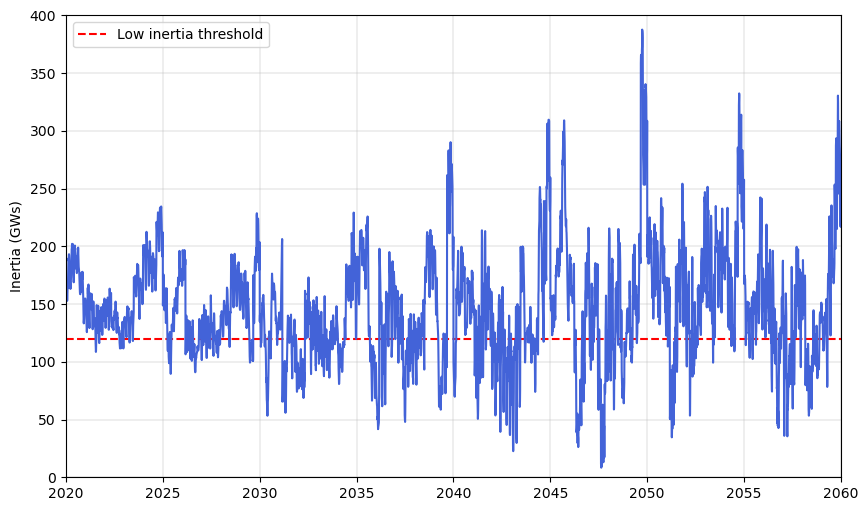

Total imbalance cost 2020-2060: 92415.7 MNOK
Average imbalance cost per year: 2310.4 MNOK
Average prod per year: 675.8 TWh
Additional cost per kWh: 0.003 NOK/kWh
Additional imbalance cost per GW wind: 19.1 MNOK


In [45]:
def calc_rot_mass_GWs(df_row):
    rot_mass_MWs = 0
    for tech, inertia_const in INERTIA_BY_TECH.items():
        rot_mass_MWs += df_row[tech] * inertia_const
    return rot_mass_MWs / 1000

print("Rotational mass in Nordic system 2020-2060 (hourly resolution)")

df_rotm["Rotational mass GWs"] = df_rotm.apply(lambda row: calc_rot_mass_GWs(row), axis=1)

rot_mass_GW_by_hour = list(df_rotm.groupby(by=["Period", "Hour"])["Rotational mass GWs"].sum())
hours = [i+1 for i in range(len(rot_mass_GW_by_hour))]

fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

# Should be above 120 GWs (from master thesis ^)
plt.axhline(y=120, color='r', linestyle='--')

plt.plot(hours, rot_mass_GW_by_hour, color="#4363d8")
plt.ylabel("Inertia (GWs)")
plt.margins(x=0)
plt.ylim(0, 400)

# Change ticks (720 hrs per year)
plt.xticks(ticks=[720*i for i in range(9)], labels=[2020+5*i for i in range(9)])
plt.legend(["Low inertia threshold"], handlelength=2, loc="upper left")
plt.savefig(f"SavedFigs/RotationalMass/Nordic-RotationalMass", bbox_inches='tight')
plt.show()

# Cost based on "The existing Nordic regulating power market (2011)" p.8
cost_per_kWh_NOK = 0.066 * 1.05
#cost_per_kWh_NOK = 1500 / 1000 # More extreme scenario 1.5 NOK/kWh
total_kWh_below_threshold = sum([(120-rot_mass_GW)*10**6 for rot_mass_GW in rot_mass_GW_by_hour if rot_mass_GW < 120])

# Scale hours to obtain true number of hours in a year
SCALING_FACTOR = (365*60) / 720

# Calculate cost of imbalances
total_cost_MNOK = round(total_kWh_below_threshold * cost_per_kWh_NOK * SCALING_FACTOR / 10**6, 1)
print(f"Total imbalance cost 2020-2060: {total_cost_MNOK} MNOK")
avg_cost_per_year = round(total_cost_MNOK / 40, 1)
print(f"Average imbalance cost per year: {avg_cost_per_year} MNOK")

# Calculate average additional cost per kWh of production
avg_TWh_prod_per_year = 675.8 # Calculated separetly in XLS "231209 Annual production GWh base case"
print(f"Average prod per year: {avg_TWh_prod_per_year} TWh")

additional_cost_per_kWh_NOK = round((avg_cost_per_year * 10**6) / (avg_TWh_prod_per_year * 10**9), 3)
print(f"Additional cost per kWh: {additional_cost_per_kWh_NOK} NOK/kWh")

# Calculate cost per GW wind
GW_increase_Nordic = 144-23 #From initial to 2050
increase_per_GW_MNOK = round(avg_cost_per_year / GW_increase_Nordic, 1)
print(f"Additional imbalance cost per GW wind: {increase_per_GW_MNOK} MNOK")